In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [127]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test_id = test['PassengerId']

In [128]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [130]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [131]:
train['VIP'].unique()

array([False, True, nan], dtype=object)

In [132]:
train['VIP'].replace({False: 0, True: 1}, inplace=True)
test['VIP'].replace({False: 0, True: 1}, inplace=True)
train.fillna(train['VIP'].mean(), inplace=True)
test.fillna(test['VIP'].mean(), inplace=True)

In [133]:
train['Cabin'].unique()
# cabin number. not important

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [134]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', 0.023439340400471142], dtype=object)

In [135]:
train['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2}, inplace=True)
test['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2}, inplace=True)
train.fillna(train['HomePlanet'].mean(), inplace=True)
test.fillna(test["HomePlanet"].mean(), inplace=True)

In [136]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e',
       0.023439340400471142], dtype=object)

In [137]:
train['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, inplace=True)
test['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, inplace=True)
train.fillna(train['Destination'].mean(), inplace=True)
test.fillna(test['Destination'].mean(), inplace=True)

In [138]:
train['Transported'].replace({False: 0, True: 1}, inplace=True)
train.fillna(train['Transported'].mean(), inplace=True)

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   float64
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   float64
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   float64
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 950.9+ KB


/var/folders/fq/d3g_z1jn1vlb87fzvbnvt1yc0000gn/T/ipykernel_2732/2146894326.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, ax=ax)


<Axes: >

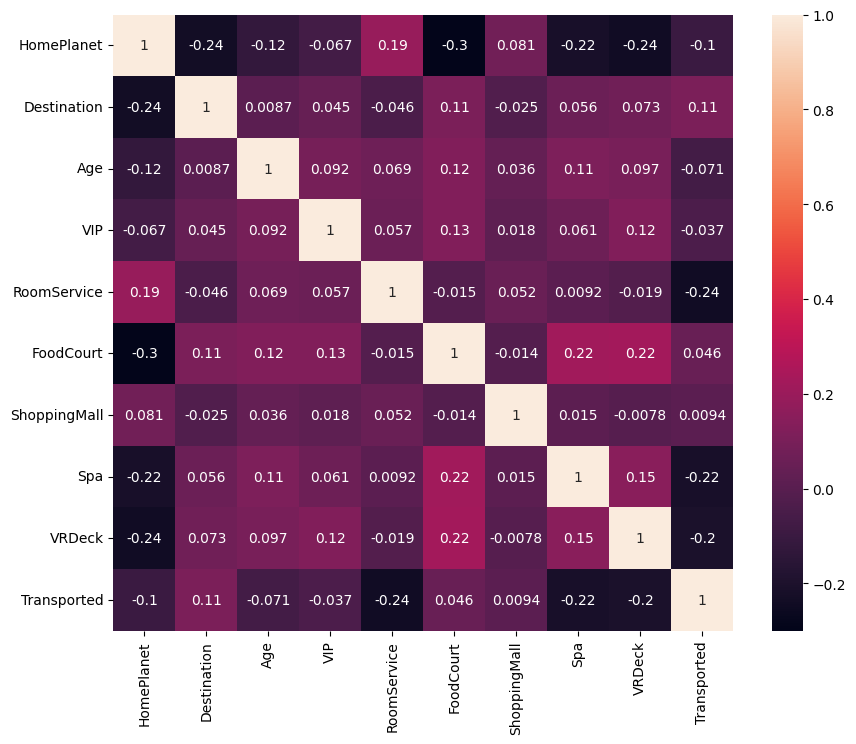

In [140]:
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, ax=ax)

In [141]:
cols = ['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'FoodCourt', 'ShoppingMall', 'Name']
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   float64
 1   Destination  8693 non-null   float64
 2   RoomService  8693 non-null   float64
 3   Spa          8693 non-null   float64
 4   VRDeck       8693 non-null   float64
 5   Transported  8693 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 407.6 KB


In [143]:
cols = ['HomePlanet', 'Destination', 'RoomService', 'Spa', 'VRDeck']
X_train = train[cols]
y_train = train['Transported']

In [144]:
# model = DecisionTreeClassifier()
params = {"n_estimators": [10, 100, 200], "max_depth": [5, 10, 50, None], "max_features": ["sqrt", "log2", None]}
model = RandomForestClassifier(random_state=0)
gscv = GridSearchCV(model, param_grid=params, cv=5, scoring="roc_auc", verbose=1)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 50, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 100, 200]},
             scoring='roc_auc', verbose=1)

In [148]:
gscv.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

In [151]:
model = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8222707925917405


In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   4277 non-null   float64
 1   Destination  4277 non-null   float64
 2   RoomService  4277 non-null   float64
 3   Spa          4277 non-null   float64
 4   VRDeck       4277 non-null   float64
dtypes: float64(5)
memory usage: 167.2 KB


In [152]:
predict = model.predict(test)
y = predict == 1

submit_csv = pd.concat([pd.Series(test_id), pd.Series(y)], axis=1)
submit_csv.columns = (['PassengerId', 'Transported'])
submit_csv.to_csv('output/submition.csv', index=False)
